In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

# Define base directories
DATA = Path("./PRAKHAR_IIITD")
IMG_DIR = Path("./images")
OUTPUT = Path("./results")
OUTPUT.mkdir(exist_ok=True)

# Representative images
emotion_images = {
    "AN": "03F_AN_C.BMP",
    "HA": "03F_HA_X.BMP",
    "NE": "03F_NE_O.BMP"
}

tasks = ["Arousal", "Categorisation", "Valence"]
emotions=["HA","AN","NE"]


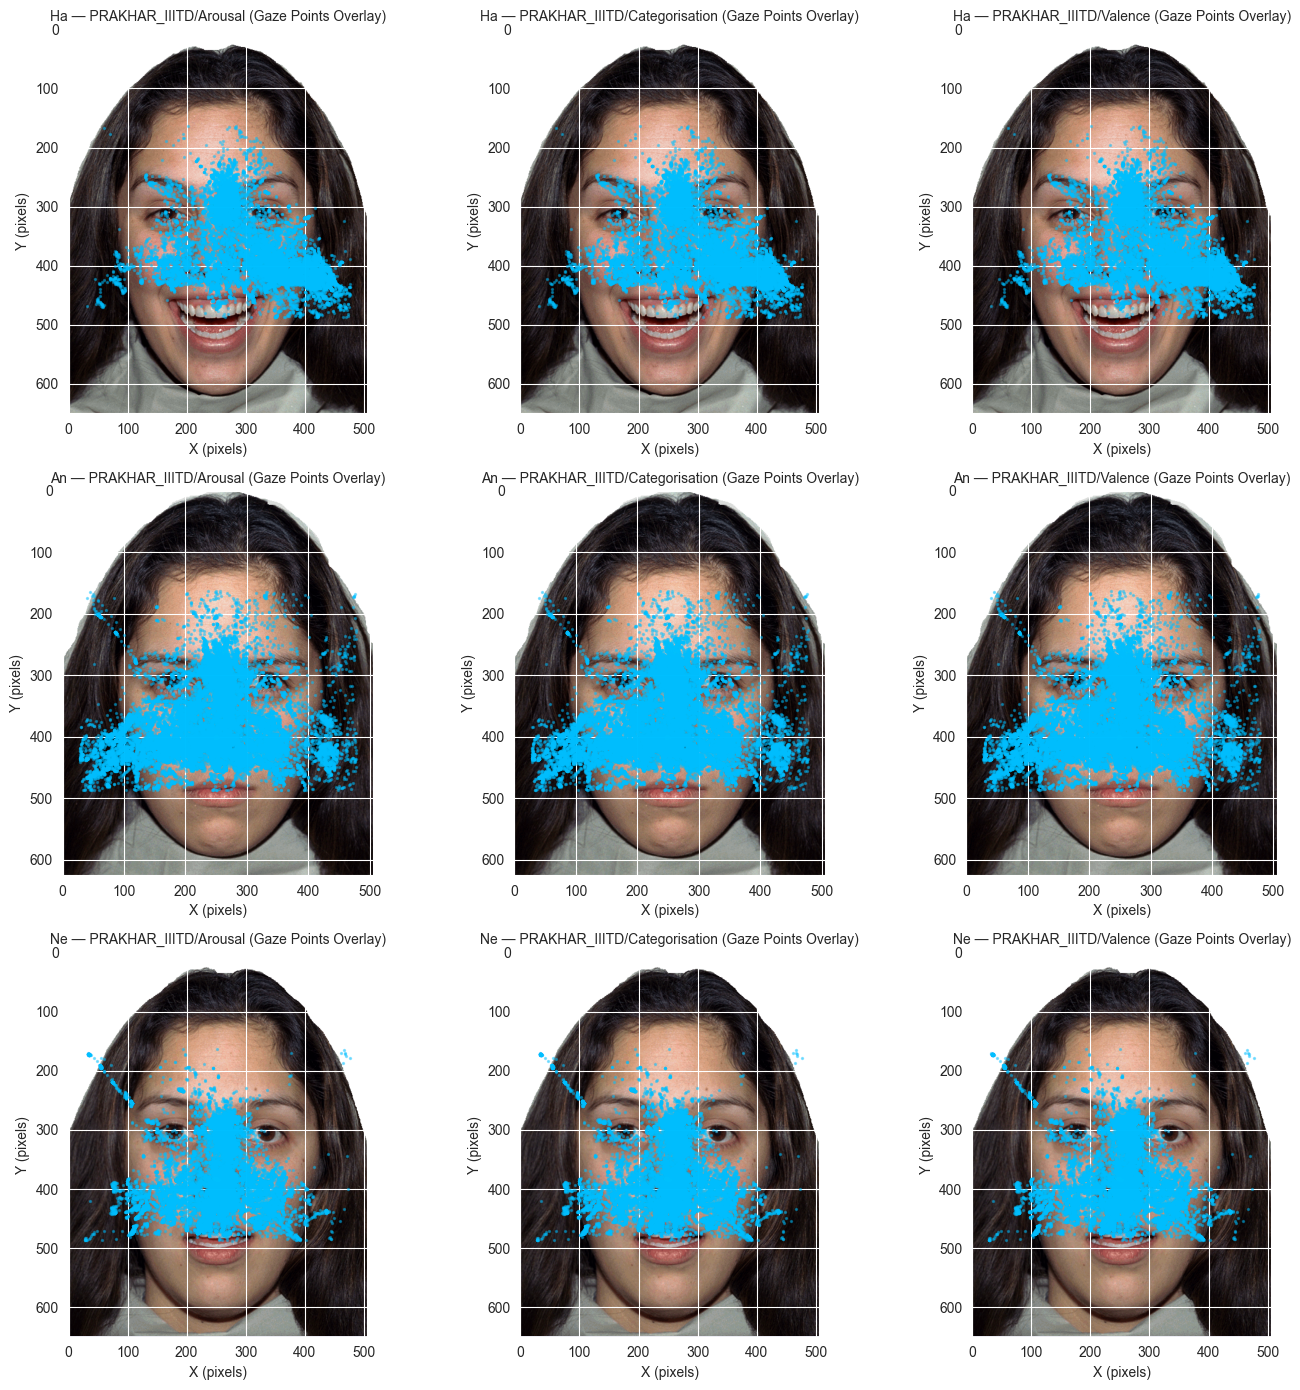

 Saved combined gaze overlay grid to: results/GazeOverlay_AllTasks_AllEmotions.png


In [7]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for row_idx, emotion in enumerate(emotions):
    for col_idx, task in enumerate(tasks):

        ax = axes[row_idx, col_idx]
        task_path = DATA / task
        dfs = []

        # collect gaze points for this emotion and task
        for i in task_path.glob("*.csv"):
            if f"_{emotion[:2].upper()}_" not in i.name:
                continue
            try:
                df = pd.read_csv(i, usecols=["pixel_x", "pixel_y"])
                dfs.append(df.dropna())
            except Exception:
                continue

        if not dfs:
            print(f" No gaze data for {task} - {emotion}")
            ax.axis("off")
            continue

        gaze_data = pd.concat(dfs, ignore_index=True)

        # load representative image for this emotion
        img_path = IMG_DIR / emotion_images[emotion]
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # plot overlay
        ax.imshow(img)
        ax.scatter(gaze_data["pixel_x"], gaze_data["pixel_y"], s=2, c="deepskyblue", alpha=0.4)
        ax.set_xlim([0, w])
        ax.set_ylim([h, 0])  # invert Y to match image orientation
        ax.set_xlabel("X (pixels)")
        ax.set_ylabel("Y (pixels)")
        ax.set_title(f"{emotion.capitalize()} — {task} (Gaze Points Overlay)", fontsize=10)

# Save the full 3×3 grid
plt.tight_layout()
save_path = OUTPUT / "GazeOverlay_AllTasks_AllEmotions.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f" Saved combined gaze overlay grid to: {save_path}")

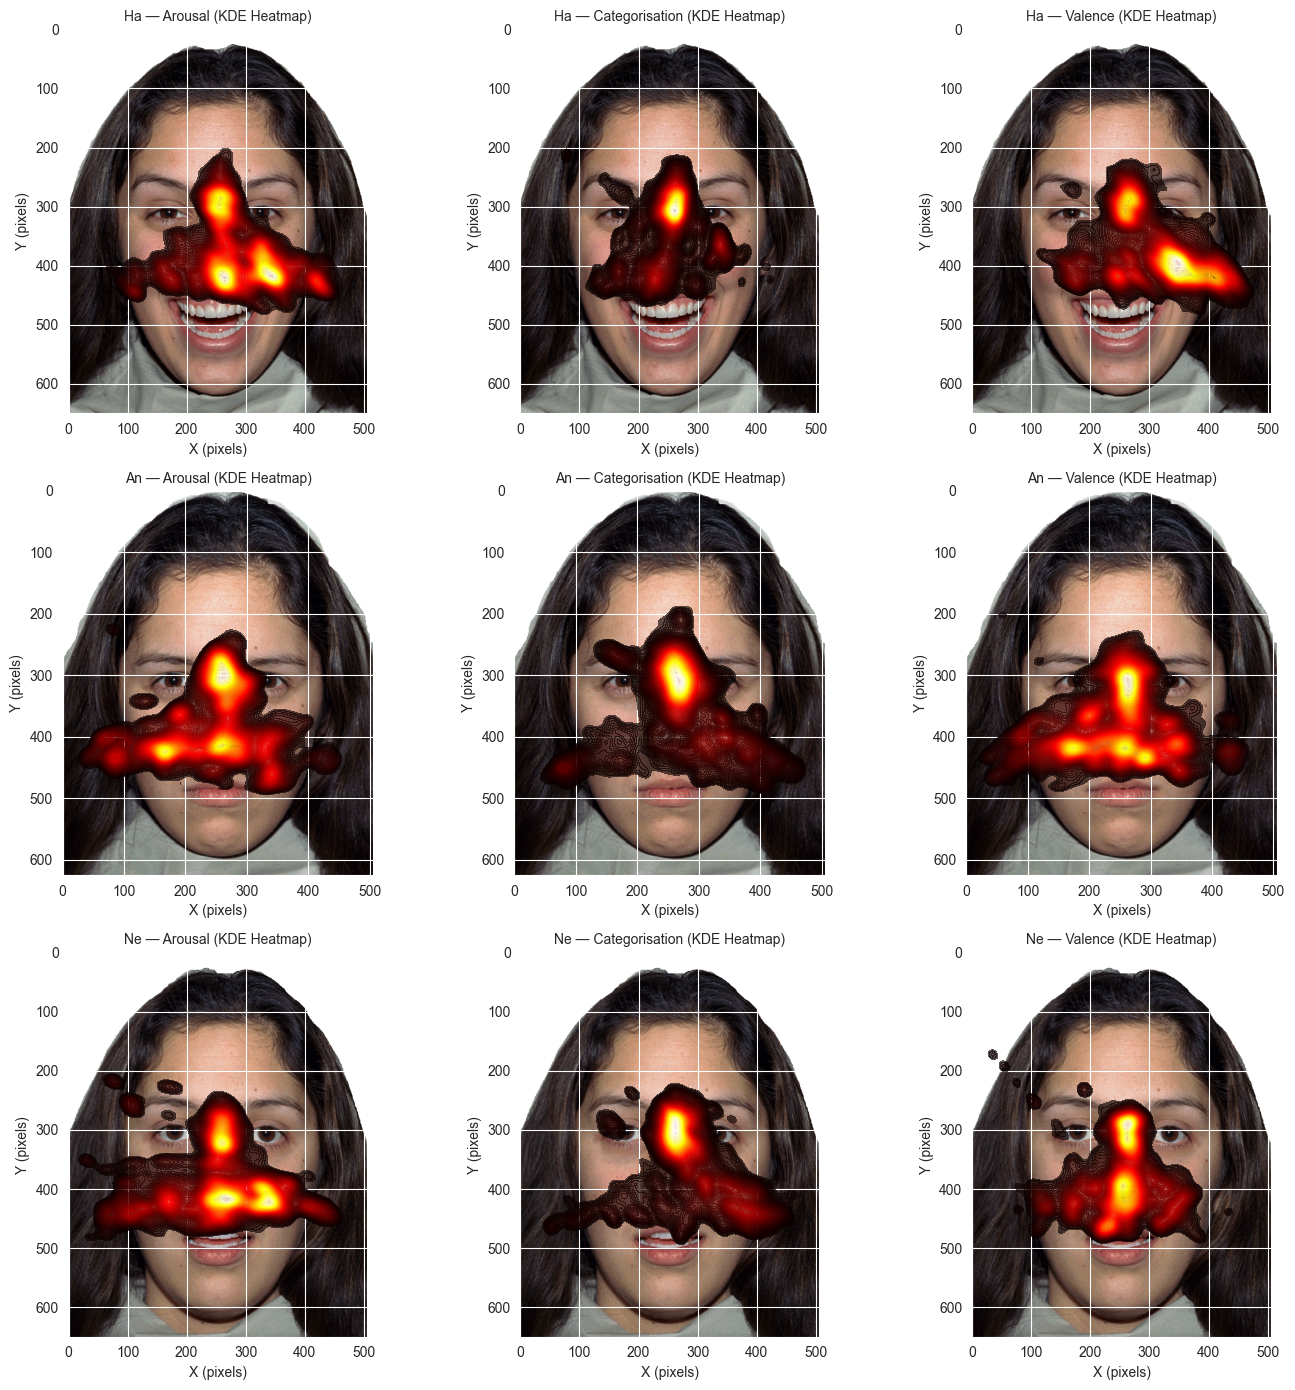

 Saved KDE heatmap grid to: results/GazeKDEHeatmap_AllTasks_AllEmotions.png


In [10]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for row_idx, emotion in enumerate(emotions):
    for col_idx, task in enumerate(tasks):

        ax = axes[row_idx, col_idx]
        task_path = DATA / task
        dfs = []

        # collect gaze points for this emotion and task
        for i in task_path.glob("*.csv"):
            if f"_{emotion[:2].upper()}_" not in i.name:
                continue
            try:
                df = pd.read_csv(i, usecols=["pixel_x", "pixel_y"])
                dfs.append(df.dropna())
            except Exception:
                continue

        if not dfs:
            print(f" No gaze data for {task} - {emotion}")
            ax.axis("off")
            continue

        gaze_data = pd.concat(dfs, ignore_index=True)

        # load representative image for this emotion
        img_path = IMG_DIR / emotion_images[emotion]
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w, _ = img.shape

        # plot background image
        ax.imshow(img, extent=[0, w, h, 0])

        # overlay gaze density using sns.kdeplot
        sns.kdeplot(
            data=gaze_data,
            x="pixel_x",
            y="pixel_y",
            fill=True,
            thresh=0.05,
            levels=100,
            cmap="hot",
            alpha=0.65,
            bw_adjust=0.8,
            ax=ax,
        )

        # formatting
        ax.set_xlim([0, w])
        ax.set_ylim([h, 0])  # invert Y to match image orientation
        ax.set_xlabel("X (pixels)")
        ax.set_ylabel("Y (pixels)")
        ax.set_title(f"{emotion.capitalize()} — {task} (KDE Heatmap)", fontsize=10)

# Save the full 3×3 grid
plt.tight_layout()
save_path = OUTPUT / "GazeKDEHeatmap_AllTasks_AllEmotions.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()

print(f" Saved KDE heatmap grid to: {save_path}")